Importing the Libraries for Data-Description

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read the data from 'dataset.csv' file and create a dataframe

In [2]:
df = pd.read_csv('dataset.csv')
df.shape

(6052, 12)

In [3]:
df.head()

,Length of URL,Has IP address,Shortening Service,Having @ Symbol,Double Slash Redirecting,Prefix-Suffix,CTLD,HTTPS in Domain,Sensitive Words,Has Tilde,Has Port,Result
0,1,1,-1,1,1,-1,1,-1,1,1,-1,1
1,1,1,1,1,1,1,1,-1,-1,1,-1,1
2,1,1,1,1,1,1,1,-1,-1,1,-1,1
3,1,1,1,1,1,1,-1,-1,1,1,-1,1
4,1,1,1,1,1,1,0,-1,1,1,-1,1


In [4]:
df.columns  

Index(['Length of URL', 'Has IP address', 'Shortening Service',
       'Having @ Symbol', 'Double Slash Redirecting', 'Prefix-Suffix', 'CTLD',
       'HTTPS in Domain', 'Sensitive Words', 'Has Tilde', 'Has Port',
       'Result'],
      dtype='object')

As the column names have leading white spaces, we will rename the columns

In [9]:
df.rename(columns={'Length of URL':'Length of URL', 'Has IP address':'Has_IP_address', 'Shortening Service':'Shortening_Service', 'Having @ Symbol':'Having_@_Symbol', 'Double Slash Redirecting':'Double_Slash_Redirecting', 'Prefix-Suffix':'Prefix-Suffix', 'CTLD':'CTLD', 'HTTPS in Domain':'HTTPS_in_Domain', 'Sensitive Words':'Sensitive_Words', 'Has Tilde':'Has_Tilde', 'Has Port':'Has_Port', 'Result':'Result'}, inplace=True)

As we had merged two csv files to create a dataset, we need to check the unique values present in each column

In [10]:
# Investigate unique values in the each column
unique_IP = df['Has_IP_address'].unique()
unique_SS = df['Shortening_Service'].unique()
unique_HAS = df['Having_@_Symbol'].unique()
unique_DSR = df['Double_Slash_Redirecting'].unique()
unique_PS = df['Prefix-Suffix'].unique()
unique_CTLD = df['CTLD'].unique()
unique_HID = df['HTTPS_in_Domain'].unique()
unique_SW = df['Sensitive_Words'].unique()
unique_HT = df['Has_Tilde'].unique()
unique_HP = df['Has_Port'].unique()
unique_R = df['Result'].unique()

In [11]:
print(unique_IP)
print(unique_SS)
print(unique_HAS)
print(unique_DSR)
print(unique_PS)
print(unique_CTLD)
print(unique_HID)
print(unique_SW)
print(unique_HT)
print(unique_HP)
print(unique_R)

['1' '-1' 'Has IP address']
['-1' '1' 'Shortening Service']
['1' '-1' 'Having @ Symbol']
['1' '-1' 'Double Slash Redirecting']
['-1' '1' 'Prefix-Suffix']
['1' '-1' '0' 'CTLD']
['-1' 'HTTPS in Domain']
['1' '-1' 'Sensitive Words']
['1' '-1' 'Has Tilde']
['-1' '1' 'Has Port']
['1' 'Result' '-1']


As there are white-space along with 1, 0, and -1 we need to remove rest of the things, and then convert the values to int 

In [12]:
validValues = {-1, 0, 1}

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[df[column].isin(validValues)]

# Convert all columns to integers (again after the filtering)
df = df.astype(int)

/tmp/ipykernel_14078/837780899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


In [13]:
# Now you can use the DataFrame with valid integer values (1, -1, and 0)
print(df)

      Length of URL  Has_IP_address  Shortening_Service  Having_@_Symbol  \
0                 1               1                  -1                1   
1                 1               1                   1                1   
2                 1               1                   1                1   
3                 1               1                   1                1   
4                 1               1                   1                1   
...             ...             ...                 ...              ...   
6047              1               1                   1                1   
6048              1               1                   1                1   
6049              1               1                   1                1   
6050              1               1                   1                1   
6051              1               1                   1                1   

      Double_Slash_Redirecting  Prefix-Suffix  CTLD  HTTPS_in_Domain  \
0              

Again check for the unique values present in each column

In [14]:
# Investigate unique values in the each column
unique_IP_2 = df['Has_IP_address'].unique()
unique_SS_2 = df['Shortening_Service'].unique()
unique_HAS_2 = df['Having_@_Symbol'].unique()
unique_DSR_2 = df['Double_Slash_Redirecting'].unique()
unique_PS_2 = df['Prefix-Suffix'].unique()
unique_CTLD_2 = df['CTLD'].unique()
unique_HID_2 = df['HTTPS_in_Domain'].unique()
unique_SW_2 = df['Sensitive_Words'].unique()
unique_HT_2 = df['Has_Tilde'].unique()
unique_HP_2 = df['Has_Port'].unique()
unique_R_2 = df['Result'].unique()

In [15]:
print(unique_IP_2)
print(unique_SS_2)
print(unique_HAS_2)
print(unique_DSR_2)
print(unique_PS_2)
print(unique_CTLD_2)
print(unique_HID_2)
print(unique_SW_2)
print(unique_HT_2)
print(unique_HP_2)
print(unique_R_2)

[ 1 -1]
[-1  1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1  0]
[-1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1]


In [16]:
df.shape

(6051, 12)

In [17]:
print("number of 1",len(df[df["Result"]==1]))
print("number of -1",len(df[df["Result"]==-1]))

number of 1 3387
number of -1 2664


We now find the correlation between the columns values

In [18]:
corr=df.corr()
corr

,Length of URL,Has_IP_address,Shortening_Service,Having_@_Symbol,Double_Slash_Redirecting,Prefix-Suffix,CTLD,HTTPS_in_Domain,Sensitive_Words,Has_Tilde,Has_Port,Result
Length of URL,1.000000,-0.033295,-0.039357,0.137133,0.194181,0.068244,0.185203,NaN,0.066572,0.067161,-0.029377,0.086165
Has_IP_address,-0.033295,1.000000,-0.017064,-0.007343,-0.011026,-0.037825,0.116544,NaN,-0.008137,0.041526,0.004095,-0.013340
Shortening_Service,-0.039357,-0.017064,1.000000,0.001226,0.052910,-0.081451,-0.070826,NaN,0.056564,0.000414,-0.021847,-0.141979
Having_@_Symbol,0.137133,-0.007343,0.001226,1.000000,0.390813,-0.038885,0.022226,NaN,-0.001422,-0.005616,0.006244,-0.049303
Double_Slash_Redirecting,0.194181,-0.011026,0.052910,0.390813,1.000000,-0.073918,0.000242,NaN,0.160760,0.011713,-0.026889,-0.132321
Prefix-Suffix,0.068244,-0.037825,-0.081451,-0.038885,-0.073918,1.000000,0.138016,NaN,-0.015008,-0.014072,0.032167,0.418135
CTLD,0.185203,0.116544,-0.070826,0.022226,0.000242,0.138016,1.000000,NaN,0.001726,0.000162,-0.008103,0.322491
HTTPS_in_Domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sensitive_Words,0.066572,-0.008137,0.056564,-0.001422,0.160760,-0.015008,0.001726,NaN,1.000000,-0.013759,-0.100395,-0.072281
Has_Tilde,0.067161,0.041526,0.000414,-0.005616,0.011713,-0.014072,0.000162,NaN,-0.013759,1.000000,0.003132,-0.047074


<Axes: >

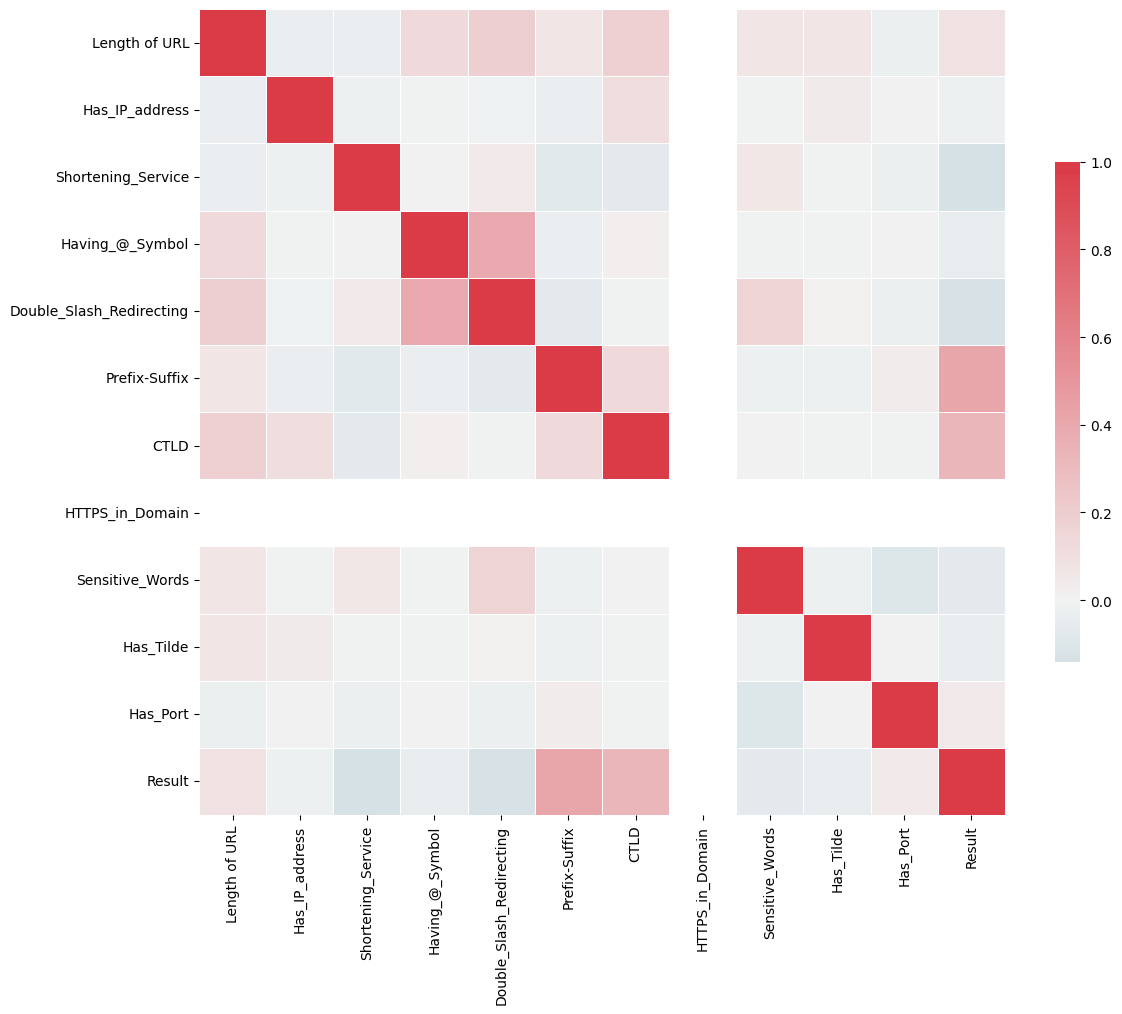

In [19]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})